Noah Anderson  
Module 2  
6/14/2024  

# Question 1

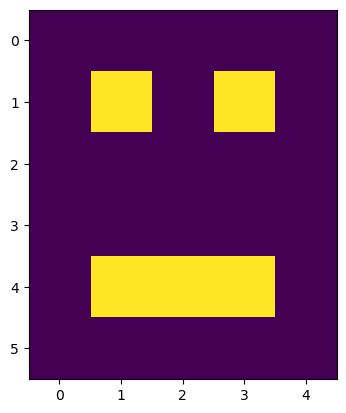

In [50]:
import numpy as np
import matplotlib.pyplot as plt
neutral_face = np.array([[0, 0, 0, 0, 0],
                         [0, 1, 0, 1, 0],
                         [0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0],
                         [0, 1, 1, 1, 0],
                         [0, 0, 0, 0, 0]])
plt.imshow(neutral_face)

## a. 

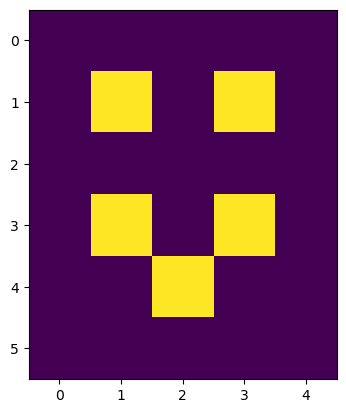

In [52]:
# Copy smiling face from neutral face
smiling_face = neutral_face.copy()

# Change the array elements to create a smile
smiling_face[3, 1] = 1
smiling_face[3, 3] = 1
smiling_face[4, 1] = 0
smiling_face[4, 3] = 0


# Plot smiling face
plt.imshow(smiling_face)

## b. 

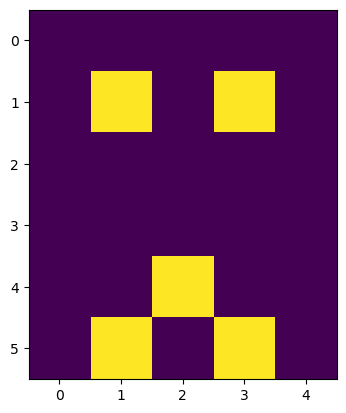

In [54]:
# Copy frowning face from neutral face
frowning_face = neutral_face.copy()

# Delete 4th row and insert new 4th row
frowning_face = np.delete(frowning_face, 4, axis = 0)
replacement_4th_row = [[0, 0, 1, 0, 0]]
frowning_face = np.insert(arr = frowning_face, obj = 4, values = replacement_4th_row, axis = 0)

# Delete 5th row and append new 5th row
frowning_face = np.delete(frowning_face, 5, axis = 0)
replacement_5_row = [[0, 1, 0, 1, 0]]
frowning_face = np.append(frowning_face, replacement_5_row, axis = 0)

# Plot frowning face
plt.imshow(frowning_face)

                        

## c. 

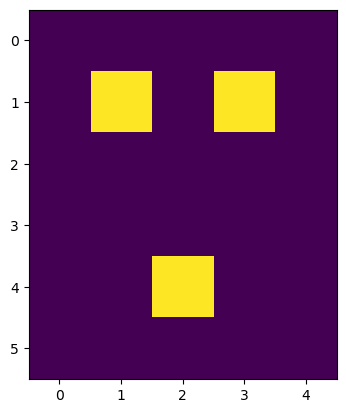

In [56]:
# Copy surprised face from neutral face
surprised_face = neutral_face.copy()

# Replace the 4th row with a surprised face
surprised_face[4, :] = [0, 0, 1, 0, 0]

# Plot surprised face
plt.imshow(surprised_face)


# Question 2

## a. 

In [59]:
# Define image stack as a 3D array of all 4 faces
image_stack = np.stack((neutral_face, smiling_face, frowning_face, surprised_face), 0)

# Verify correct dimensions
image_stack.ndim

3

## b. 

In [61]:
# Reshape image_stack into a 2d array with each row corresponding to a face
image_stack = image_stack.reshape(4, 30)

# Print number of dimensions to verify
print("Number of dimensions:", image_stack.ndim)

# Print image stack
print(image_stack)

Number of dimensions: 2
[[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


# Question 3

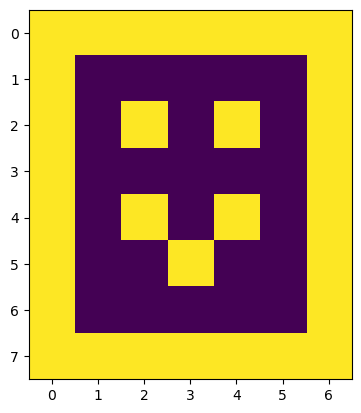

In [63]:
# Create 8 by 7 array filled with 1's
smiling_face_w_border = np.full((8, 7), 1)

# Set middle of array to smiling face
smiling_face_w_border[1:7, 1:6] = smiling_face

# Print smiling face with border
plt.imshow(smiling_face_w_border)

## Question 4

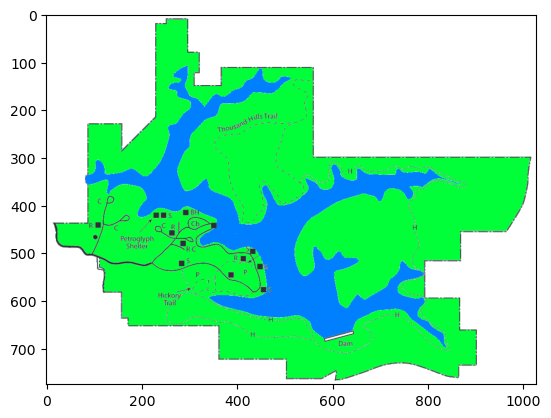

In [65]:
import matplotlib.image as image
th_map = image.imread("thousand_hills_color.png")
type(th_map)
np.shape(th_map)
plt.imshow(th_map)

## a. 

(775, 1027)


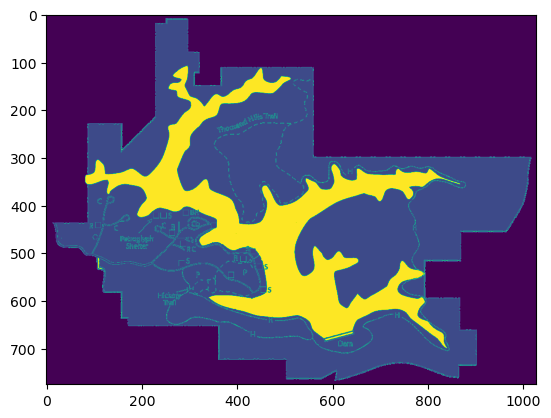

In [67]:
# Extract the 2nd (blue) layer from th_map
th_blue = th_map[:, : , 2]

# Print the shape of th_blue
print(np.shape(th_blue))

# Plot th_blue
plt.imshow(th_blue)

The shape is 775 by 1027 which is to be expected since it is only a single layer. Additionally the map looks consistent with what I would expect since the lake is shown as the most intense portion of the map. 

## b. 

In [70]:
# Calculate the 90th percentile
percentile_90_blue = np.percentile(th_blue, 90)

# Print the 90th percentile of the blue layer
print(percentile_90_blue)

1.0


## c. 

In [72]:
# Index the pixels in the 90th percentile
most_blue = th_blue[th_blue == percentile_90_blue]

# Calculate the number of most blue pixels
n_most_blue = len(most_blue)

# Print the number of most blue pixels
print(n_most_blue)

91583


## d. 

In [74]:
# Extract the alpha layer
th_alpha = th_map[:, :, 3]

# Calculate the 90th percentile for the alpha layer
percentile_90_alpha = np.percentile(th_alpha, 90)

# Slice the 90th percentile of opacity from the alpha layer
most_opaque = th_alpha[th_alpha == percentile_90_alpha]

# Calculate the number of most opaque pixels
n_most_opaque = len(most_opaque)

# Print the number of most opaque pixels
print(n_most_opaque)

413761


## e.

In [76]:
# Calculate percentage of th_map that is taken by the lake
percent_lake = np.round( n_most_blue / n_most_opaque, 3) * 100

print("The percent of Thousand Hills State Park occupied by Forrest lake is", 
      percent_lake, "%")

The percent of Thousand Hills State Park occupied by Forrest lake is 22.1 %


## f.

In [78]:
print("Number of most blue pixels:", n_most_blue)
print("Number of most opaque pixels:", n_most_opaque)

Number of most blue pixels: 91583
Number of most opaque pixels: 413761


The number of opaque pixels seem reasonable when compared with the map image. Roughly half the pixels are opaque, which passes visual inspection of the map. The lake pixels are aproximately 11 percent of the image which also passes a visual inspection. Additionaly 22.1% seems consistent with an inspection of the image.